<a href="https://colab.research.google.com/github/Krishna18-Kunal/Guvi_project/blob/main/Student__Marks_and_Grades__Summary(By_CSV_File).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Summary:

      Name  Total    Average Grade
0  Krishna    260  86.666667     A
1     Soun    236  78.666667     B
2    Kunal    246  82.000000     B
3    Rahul    205  68.333333     C
4    Sunny    200  66.666667     C
5  Aaditya    216  72.000000     B

Class Average: 75.72
Topper: Krishna (Avg: 86.67, Grade: A)


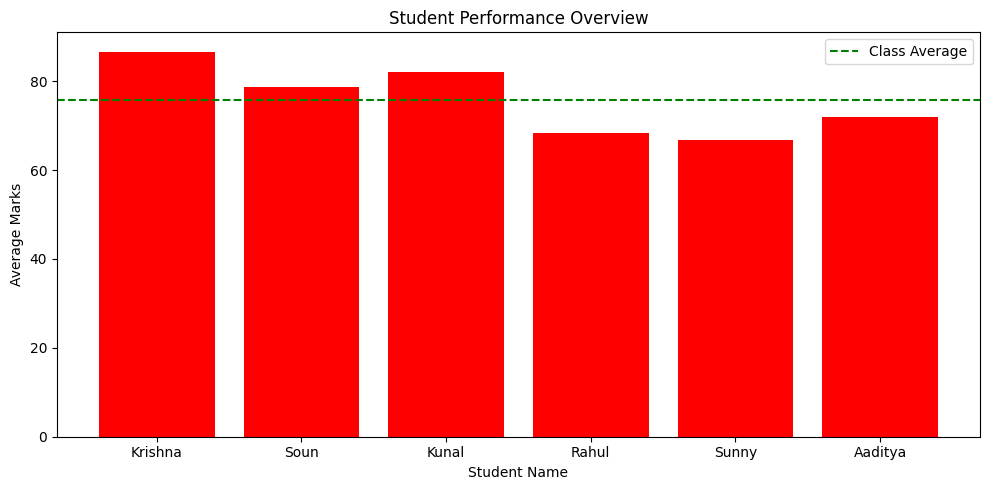

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

GRADE_CRITERIA = {
    'A': (85, 100),
    'B': (70, 84),
    'C': (55, 69),
    'D': (40, 54),
    'F': (0, 39)
}



def assignment_grade(avg):
    for grade, (low, high) in GRADE_CRITERIA.items():
        if low <= avg <= high:
            return grade
    return 'F'

def refine_data(df):
    df = df.fillna(0)  # Fill missing values with 0
    for col in ['Maths', 'Science', 'Social science']:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    return df

def process_dataset(df):
    df['Total'] = df[['Maths', 'Science', 'Social science']].sum(axis=1)
    df['Average'] = df['Total'] / 3
    df['Grade'] = df['Average'].apply(assignment_grade)
    return df

def stud_summary(df):
    class_avg = df['Average'].mean()
    topper = df.loc[df['Average'].idxmax()]
    return class_avg, topper

def plot_student_scores(df):
    plt.figure(figsize=(10, 5))
    plt.bar(df['Name'], df['Average'], color='red')
    plt.axhline(df['Average'].mean(), color='green', linestyle='--', label='Class Average')
    plt.title("Student Performance Overview")
    plt.xlabel("Student Name")
    plt.ylabel("Average Marks")
    plt.legend()
    plt.tight_layout()
    plt.show()


def main():

    csv_path = '/content/students.csv'
    df = pd.read_csv(csv_path)

    df = refine_data(df)
    df = process_dataset(df)

    print("Student Summary:\n")
    print(df[['Name', 'Total', 'Average', 'Grade']])

    class_avg, topper = stud_summary(df)
    print(f"\nClass Average: {class_avg:.2f}")
    print(f"Topper: {topper['Name']} (Avg: {topper['Average']:.2f}, Grade: {topper['Grade']})")

    plot_student_scores(df)

# Run
if __name__ == "__main__":
    main()